In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,normalize,MinMaxScaler,PowerTransformer,RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import pickle
import json

In [2]:
data = pd.read_csv("prob_2.csv")
data

,purchases,balance,credit_limit,payments,tenure,oneoff_purchases,installments_purchases,cash_advance,prc_full_payment,cash_advance_frequency,cash_advance_trx,purchases_trx,minimum_payments,balance_frequency,oneoff_purchases_frequency,purchases_installments_frequency,default
0,95.40,40.900749,1000.0,201.802084,12,0.00,95.40,0.000000,0.000000,0.000000,0,2,139.509787,0.818182,0.000000,0.083333,0
1,0.00,3202.467416,7000.0,4103.032597,12,0.00,0.00,6442.945483,0.222222,0.250000,4,0,1072.340217,0.909091,0.000000,0.000000,0
2,773.17,2495.148862,7500.0,622.066742,12,773.17,0.00,0.000000,0.000000,0.000000,0,12,627.284787,1.000000,1.000000,0.000000,1
3,1499.00,1666.670542,7500.0,0.000000,12,1499.00,0.00,205.788017,0.000000,0.083333,1,1,0.000000,0.636364,0.083333,0.000000,0
4,16.00,817.714335,1200.0,678.334763,12,16.00,0.00,0.000000,0.000000,0.000000,0,1,244.791237,1.000000,0.083333,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,291.12,28.493517,1000.0,325.594462,6,0.00,291.12,0.000000,0.500000,0.000000,0,6,48.886365,1.000000,0.000000,0.833333,0
8946,300.00,19.183215,1000.0,275.861322,6,0.00,300.00,0.000000,0.000000,0.000000,0,6,0.000000,1.000000,0.000000,0.833333,0
8947,144.40,23.398673,1000.0,81.270775,6,0.00,144.40,0.000000,0.250000,0.000000,0,5,82.418369,0.833333,0.000000,0.666667,1
8948,0.00,13.457564,500.0,52.549959,6,0.00,0.00,36.558778,0.250000,0.166667,2,0,55.755628,0.833333,0.000000,0.000000,1


In [3]:
df = data.drop(["default"],axis = 1)
df

,purchases,balance,credit_limit,payments,tenure,oneoff_purchases,installments_purchases,cash_advance,prc_full_payment,cash_advance_frequency,cash_advance_trx,purchases_trx,minimum_payments,balance_frequency,oneoff_purchases_frequency,purchases_installments_frequency
0,95.40,40.900749,1000.0,201.802084,12,0.00,95.40,0.000000,0.000000,0.000000,0,2,139.509787,0.818182,0.000000,0.083333
1,0.00,3202.467416,7000.0,4103.032597,12,0.00,0.00,6442.945483,0.222222,0.250000,4,0,1072.340217,0.909091,0.000000,0.000000
2,773.17,2495.148862,7500.0,622.066742,12,773.17,0.00,0.000000,0.000000,0.000000,0,12,627.284787,1.000000,1.000000,0.000000
3,1499.00,1666.670542,7500.0,0.000000,12,1499.00,0.00,205.788017,0.000000,0.083333,1,1,0.000000,0.636364,0.083333,0.000000
4,16.00,817.714335,1200.0,678.334763,12,16.00,0.00,0.000000,0.000000,0.000000,0,1,244.791237,1.000000,0.083333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,291.12,28.493517,1000.0,325.594462,6,0.00,291.12,0.000000,0.500000,0.000000,0,6,48.886365,1.000000,0.000000,0.833333
8946,300.00,19.183215,1000.0,275.861322,6,0.00,300.00,0.000000,0.000000,0.000000,0,6,0.000000,1.000000,0.000000,0.833333
8947,144.40,23.398673,1000.0,81.270775,6,0.00,144.40,0.000000,0.250000,0.000000,0,5,82.418369,0.833333,0.000000,0.666667
8948,0.00,13.457564,500.0,52.549959,6,0.00,0.00,36.558778,0.250000,0.166667,2,0,55.755628,0.833333,0.000000,0.000000


In [4]:
std = RobustScaler()
scaled = std.fit_transform(df)
scaled

array([[-0.24837108, -0.43226678, -0.40816327, ..., -1.63636364,
        -0.27777667, -0.111112  ],
       [-0.33748873,  1.20937371,  0.81632653, ..., -0.81818182,
        -0.27777667, -0.22222267],
       [ 0.38476593,  0.84209923,  0.91836735, ...,  0.        ,
         3.05555667, -0.22222267],
       ...,
       [-0.20259786, -0.44135471, -0.40816327, ..., -1.5000045 ,
        -0.27777667,  0.66666667],
       [-0.33748873, -0.44651662, -0.51020408, ..., -1.5000045 ,
        -0.27777667, -0.22222267],
       [ 0.68376779, -0.25997614, -0.36734694, ..., -3.        ,
         1.94444667, -0.22222267]])

In [5]:
def plot(data):
    for i,j in zip(df.columns, range(len(df.columns))):


        plt.figure(figsize=(15,5))

        
        plt.subplot(121)
        sns.kdeplot(df[i])
        plt.title(i+' before ')

        
        plt.subplot(122)
        sns.kdeplot(data[j])
        plt.title(i+' after ')

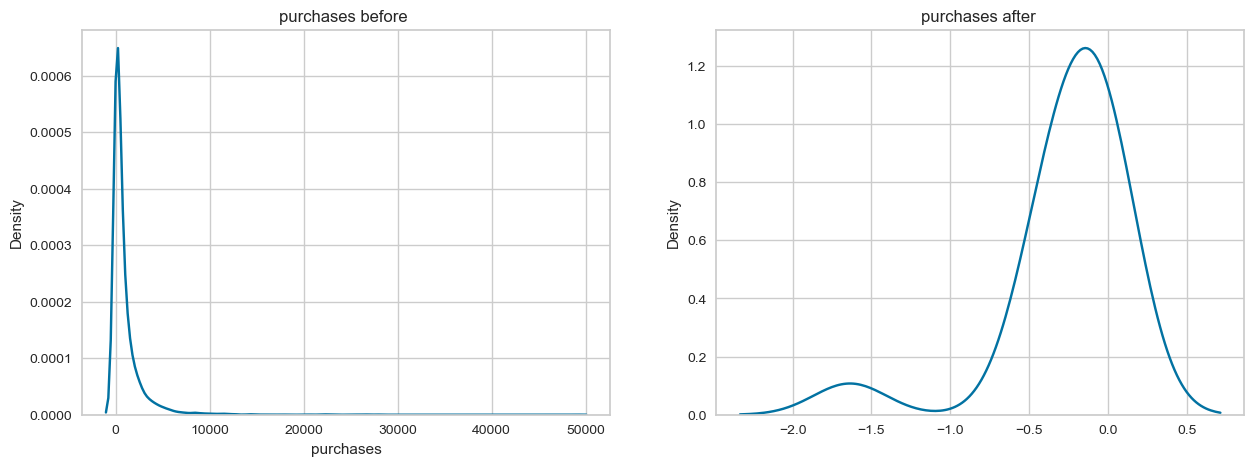

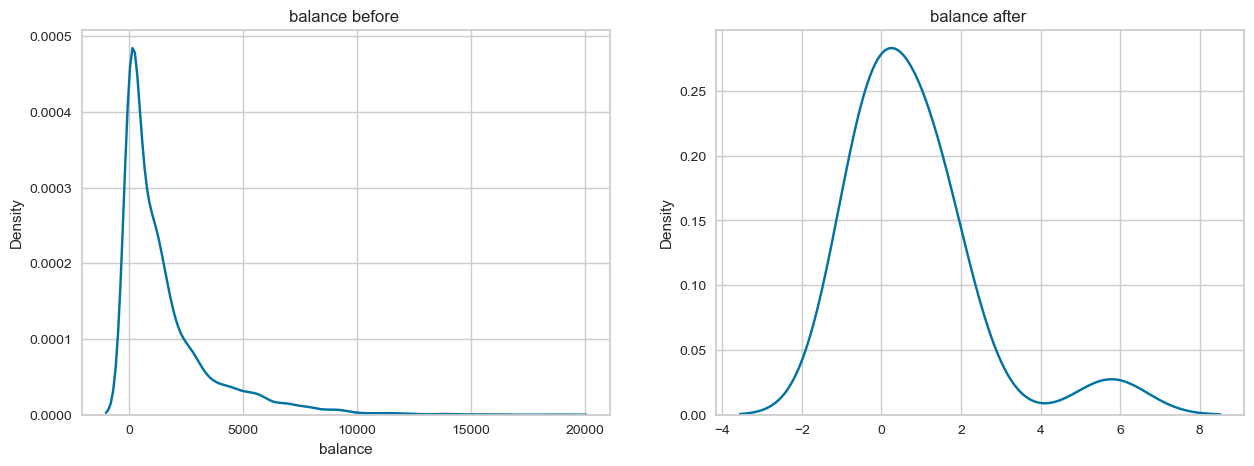

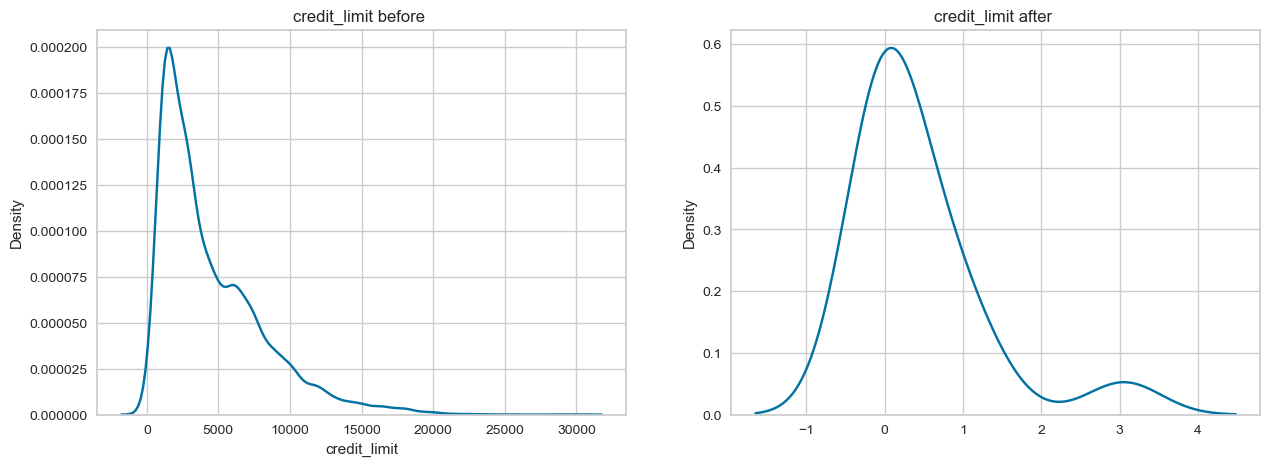

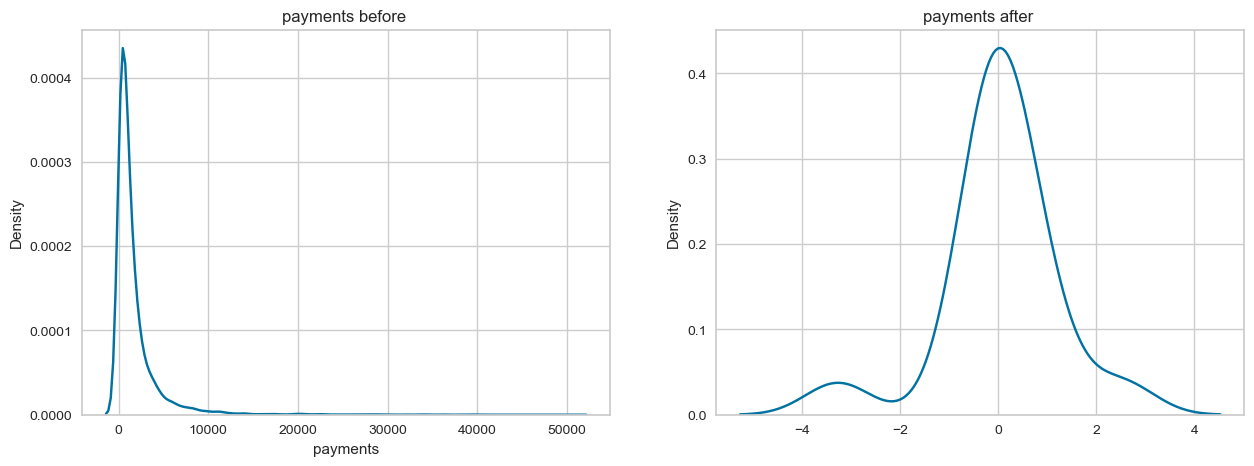

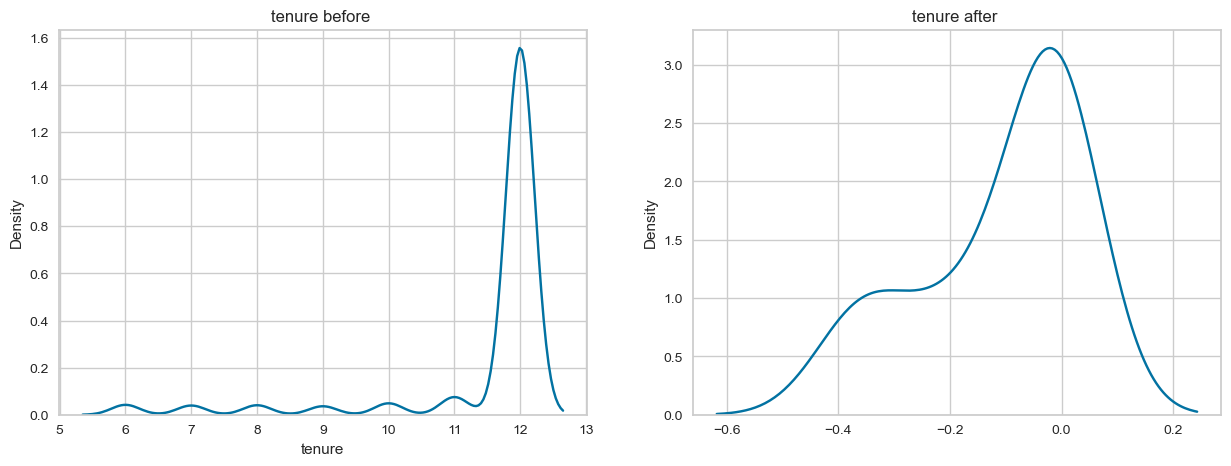

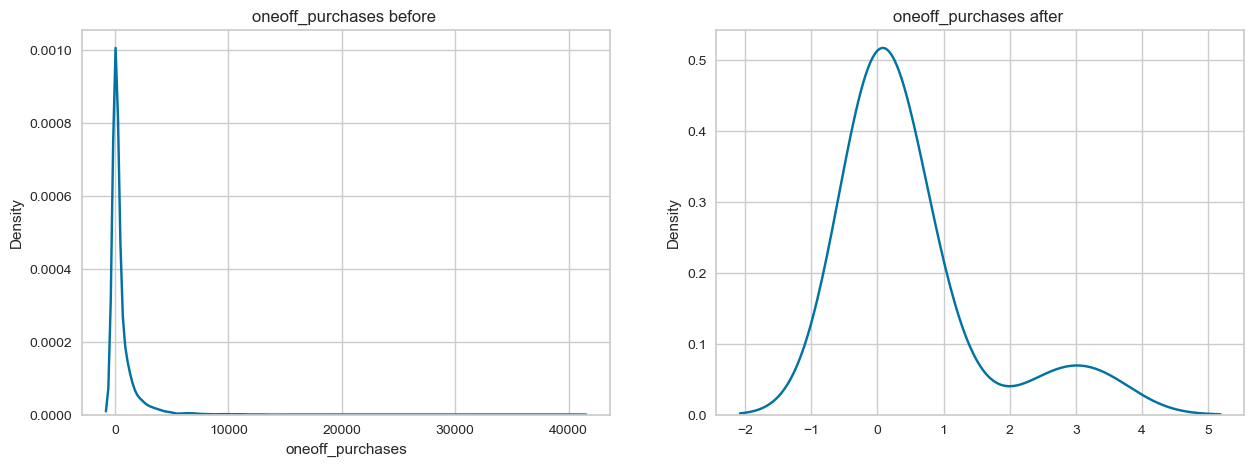

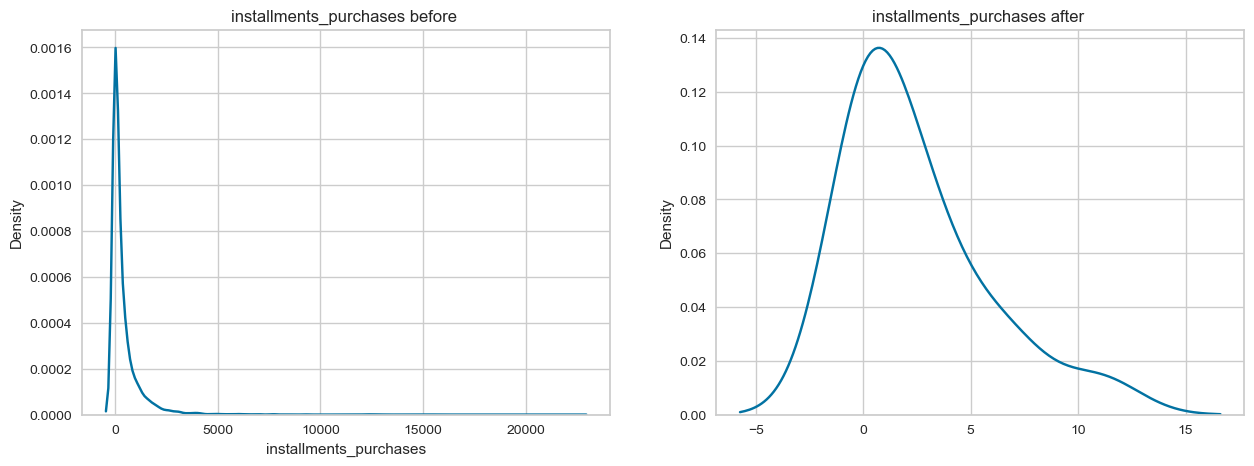

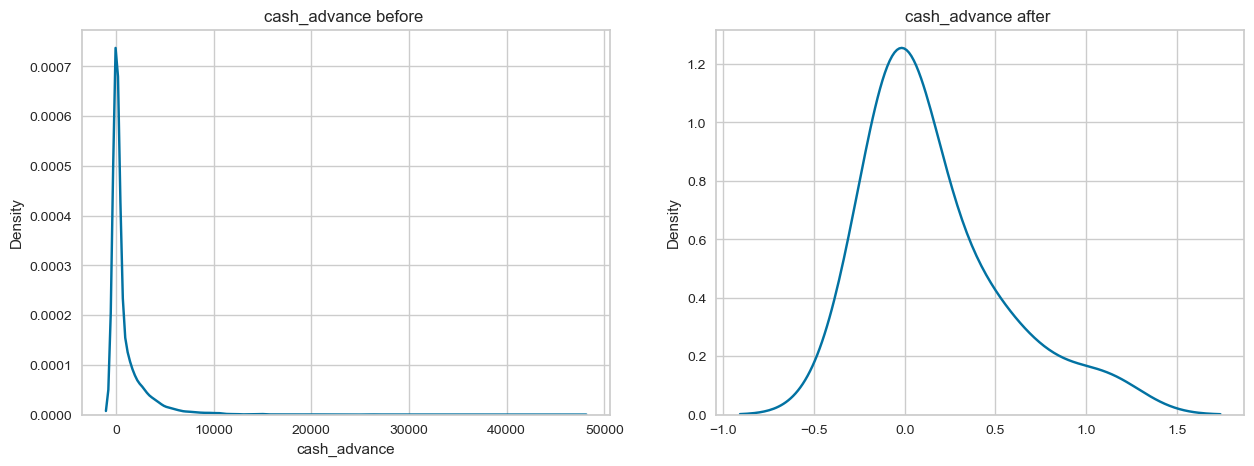

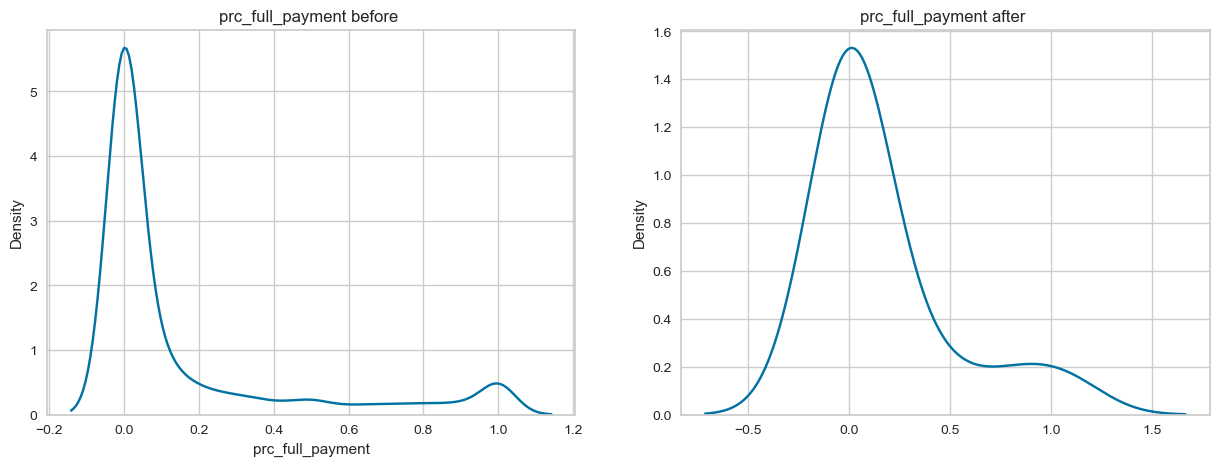

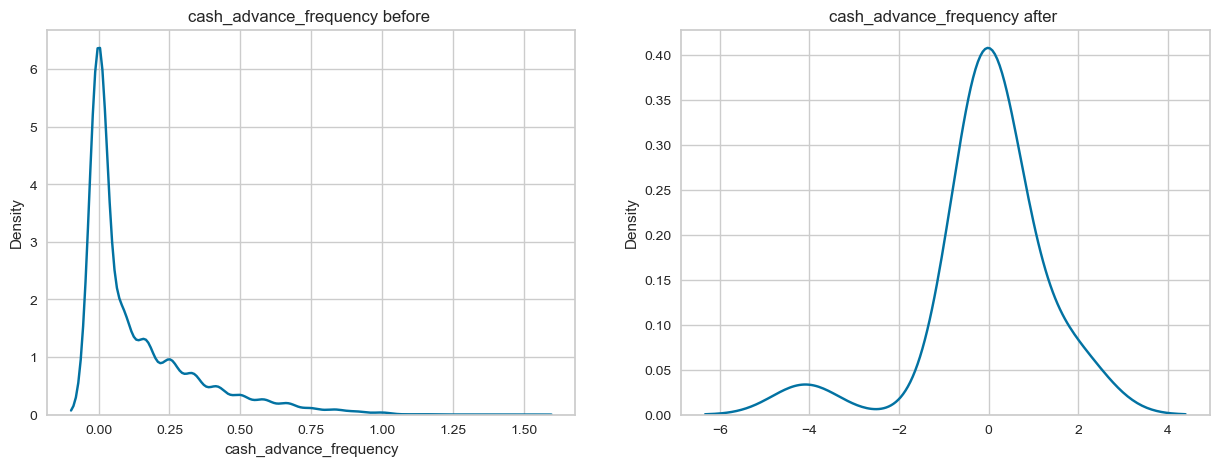

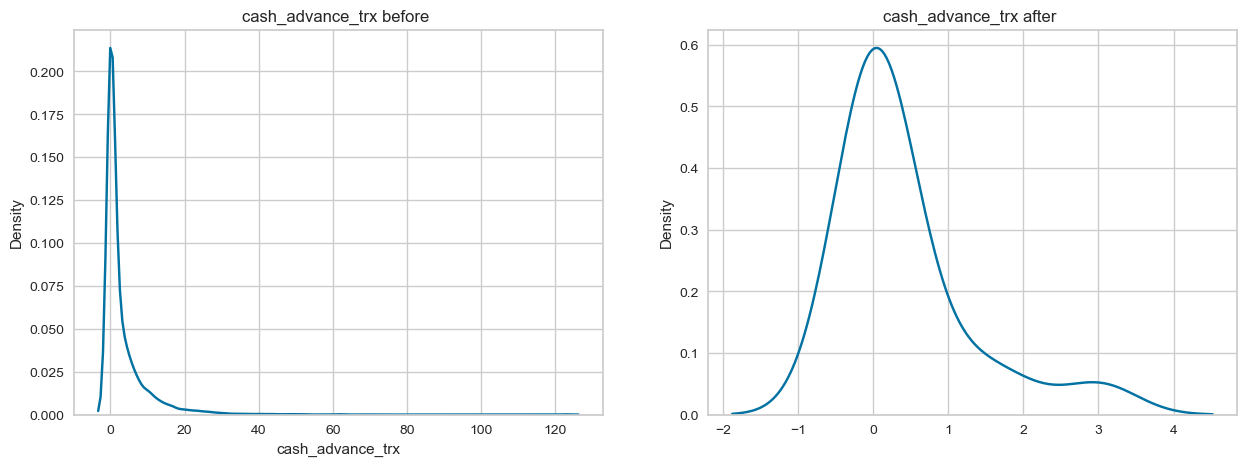

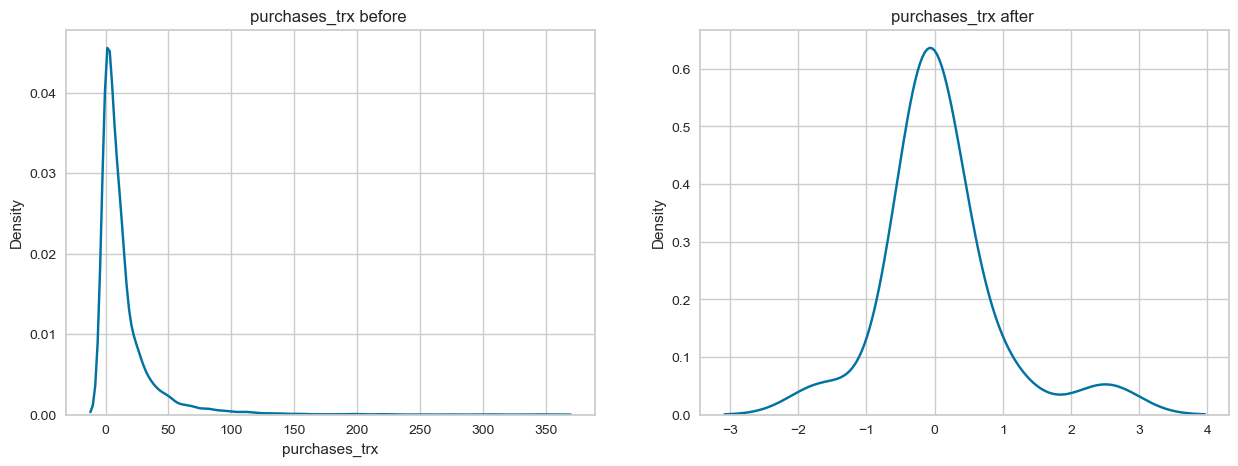

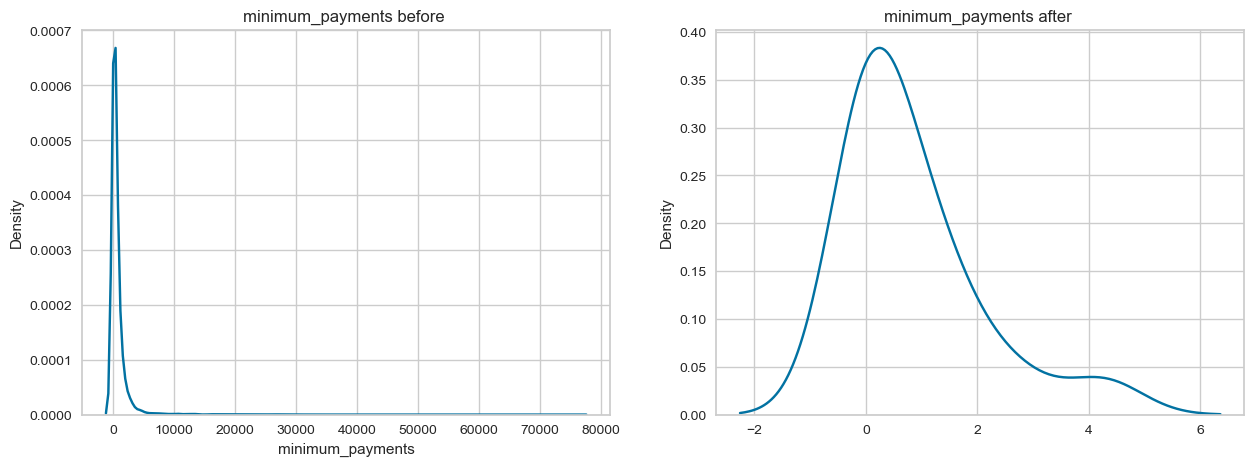

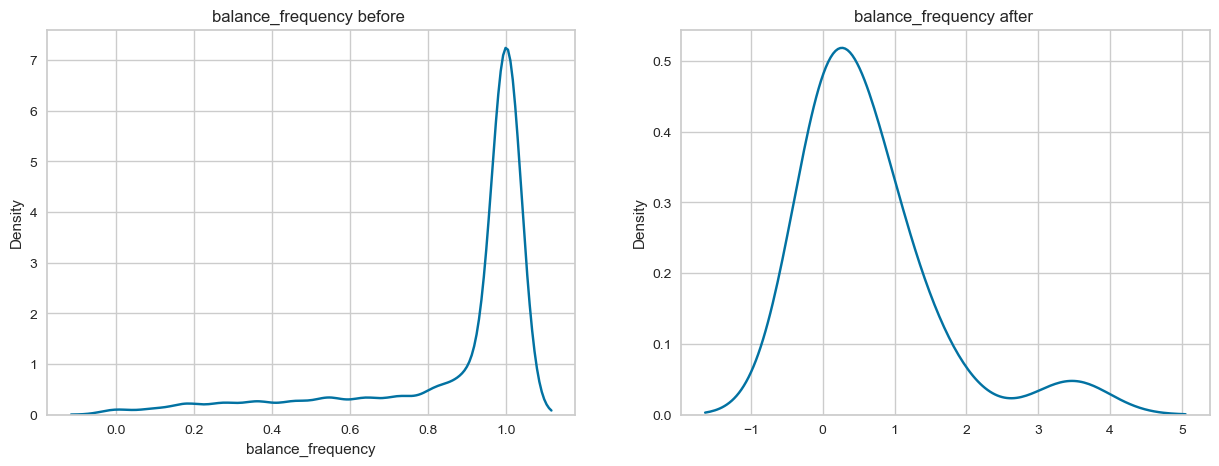

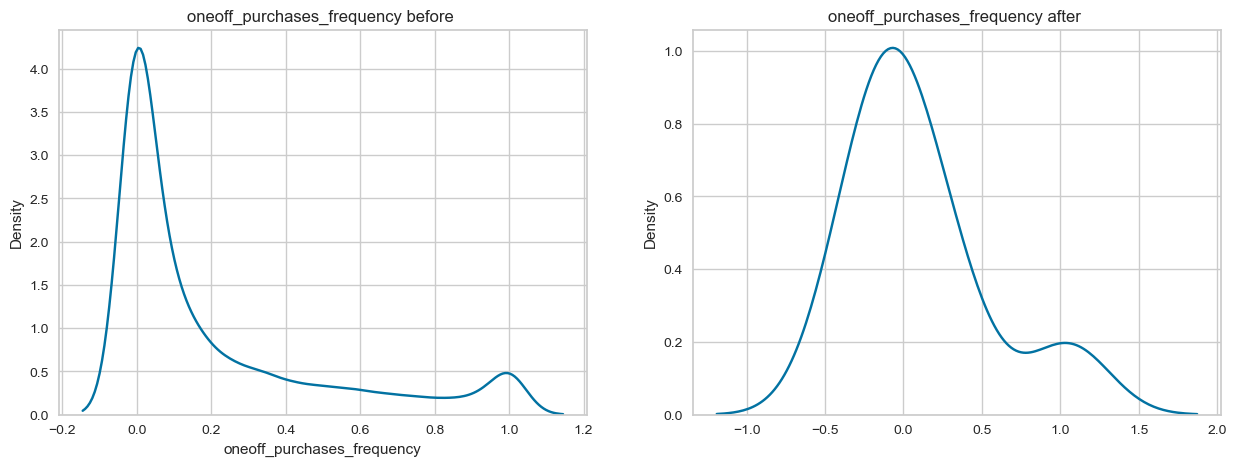

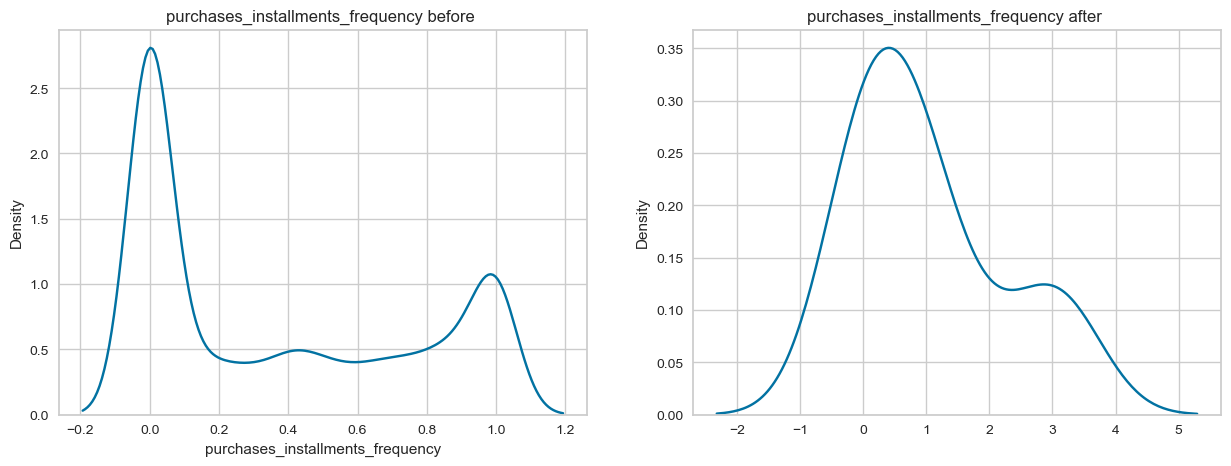

In [6]:
plot(scaled)

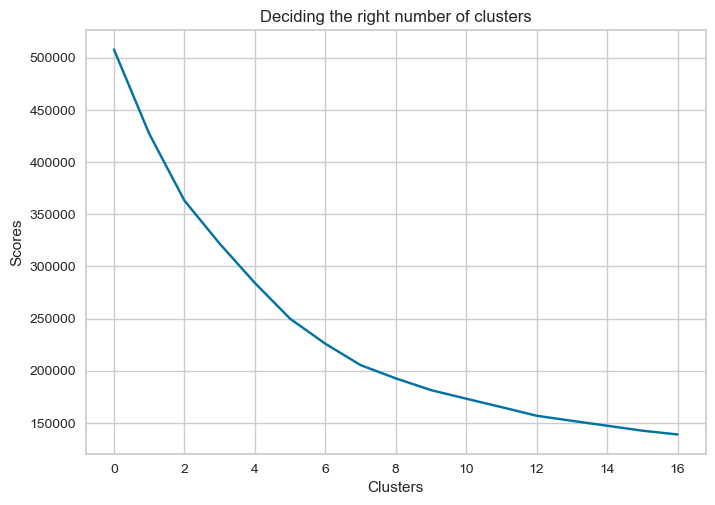

In [7]:
wcss = []

for i in range(1, 18):    
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_) 

plt.plot(wcss, 'bx-')
plt.title('Deciding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

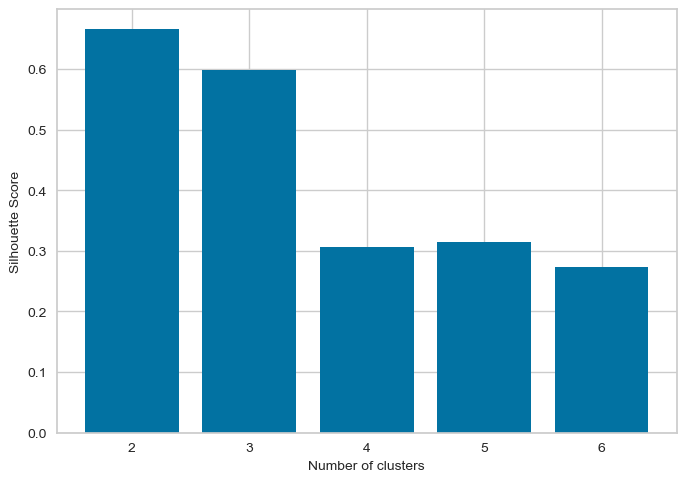

In [8]:
silhouette_scores = []

for n_cluster in range(2, 7):
    silhouette_scores.append( 
        silhouette_score(scaled, KMeans(n_clusters = n_cluster).fit_predict(scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6] 

plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [9]:
kmean= KMeans(n_clusters=2,random_state=12)
kmean.fit(scaled)
labels=kmean.labels_
print("silhouette_score",silhouette_score(scaled,kmean.labels_))

silhouette_score 0.6653214423713906


In [10]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,purchases,balance,credit_limit,payments,tenure,oneoff_purchases,installments_purchases,cash_advance,prc_full_payment,cash_advance_frequency,cash_advance_trx,purchases_trx,minimum_payments,balance_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cluster
0,95.40,40.900749,1000.0,201.802084,12,0.00,95.4,0.000000,0.000000,0.000000,0,2,139.509787,0.818182,0.000000,0.083333,1
1,0.00,3202.467416,7000.0,4103.032597,12,0.00,0.0,6442.945483,0.222222,0.250000,4,0,1072.340217,0.909091,0.000000,0.000000,1
2,773.17,2495.148862,7500.0,622.066742,12,773.17,0.0,0.000000,0.000000,0.000000,0,12,627.284787,1.000000,1.000000,0.000000,1
3,1499.00,1666.670542,7500.0,0.000000,12,1499.00,0.0,205.788017,0.000000,0.083333,1,1,0.000000,0.636364,0.083333,0.000000,1
4,16.00,817.714335,1200.0,678.334763,12,16.00,0.0,0.000000,0.000000,0.000000,0,1,244.791237,1.000000,0.083333,0.000000,1


In [11]:
clusters['cluster'].value_counts()

1    8584
0     366
Name: cluster, dtype: int64

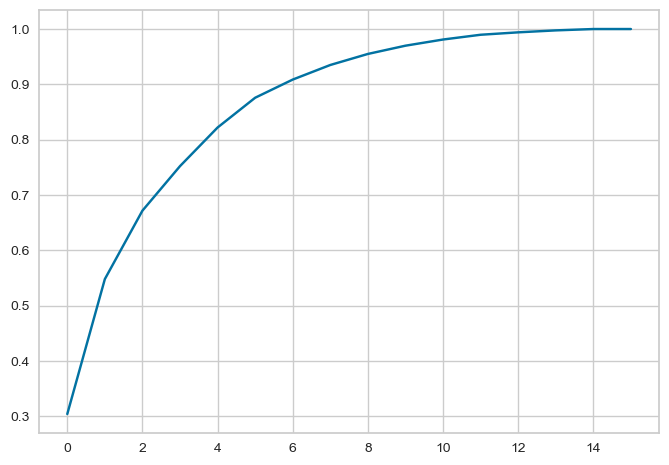

In [12]:
pca = PCA(random_state=12) 
test = pca.fit_transform(scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [13]:
pca_n = PCA(n_components = 7,random_state=12) 
X_principal_n = pca_n.fit_transform(scaled) 
X_principal_n = pd.DataFrame(X_principal_n,columns=["Pca1","Pca2","Pca3","Pca4","Pca5","Pca6","Pca7"]) 
pca_n.explained_variance_ratio_.sum()

0.9086027768409094

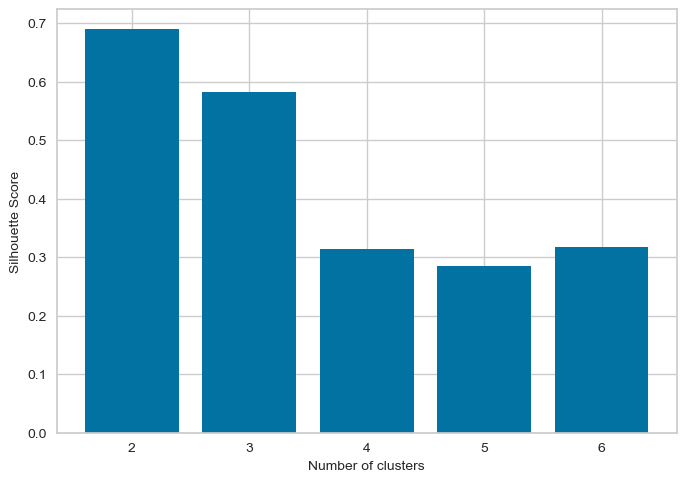

In [14]:
silhouette_scores = []

for n_cluster in range(2, 7):
    silhouette_scores.append( 
        silhouette_score(X_principal_n, KMeans(n_clusters = n_cluster).fit_predict(X_principal_n))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6] 

plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [15]:
kmean1= KMeans(n_clusters=2,random_state=12,max_iter=1000)
kmean1.fit(X_principal_n)
labels1=kmean1.labels_
print("silhouette_score",silhouette_score(X_principal_n,kmean1.labels_))

silhouette_score 0.6893728501741408


In [16]:
clusters1=pd.concat([df, pd.DataFrame({'cluster':labels1})], axis=1)
clusters1.head()

,purchases,balance,credit_limit,payments,tenure,oneoff_purchases,installments_purchases,cash_advance,prc_full_payment,cash_advance_frequency,cash_advance_trx,purchases_trx,minimum_payments,balance_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cluster
0,95.40,40.900749,1000.0,201.802084,12,0.00,95.4,0.000000,0.000000,0.000000,0,2,139.509787,0.818182,0.000000,0.083333,1
1,0.00,3202.467416,7000.0,4103.032597,12,0.00,0.0,6442.945483,0.222222,0.250000,4,0,1072.340217,0.909091,0.000000,0.000000,1
2,773.17,2495.148862,7500.0,622.066742,12,773.17,0.0,0.000000,0.000000,0.000000,0,12,627.284787,1.000000,1.000000,0.000000,1
3,1499.00,1666.670542,7500.0,0.000000,12,1499.00,0.0,205.788017,0.000000,0.083333,1,1,0.000000,0.636364,0.083333,0.000000,1
4,16.00,817.714335,1200.0,678.334763,12,16.00,0.0,0.000000,0.000000,0.000000,0,1,244.791237,1.000000,0.083333,0.000000,1


In [17]:
clusters1['cluster'].value_counts()

1    8602
0     348
Name: cluster, dtype: int64

In [18]:
final_df = pd.concat([X_principal_n, pd.DataFrame({'cluster':labels1})], axis = 1)
final_df

,Pca1,Pca2,Pca3,Pca4,Pca5,Pca6,Pca7,cluster
0,-2.564297,-0.004756,-0.954338,-0.318595,1.172851,0.474047,0.587647,1
1,-0.237048,1.797039,3.829117,1.493998,-1.406200,-0.782151,1.555426,1
2,-0.196002,-0.294451,-0.496771,-1.870410,1.475389,-0.662287,0.538911,1
3,-0.835591,-1.481274,-0.618801,1.238428,2.746241,0.193583,0.249004,1
4,-2.171905,0.246391,-0.480151,-1.642033,0.918359,-0.216354,0.754298,1
...,...,...,...,...,...,...,...,...
8945,-2.234706,-0.848499,-1.409406,-0.189837,-1.820341,-1.781235,-4.602809,1
8946,-2.407942,-0.247388,-0.532765,-1.197615,0.619136,0.148384,-4.542573,1
8947,-2.686965,-0.450764,-1.268441,0.618224,-0.100142,-0.603781,-4.572108,1
8948,-2.935973,-0.225591,-0.701455,0.781243,0.078578,-0.972027,-4.738036,1


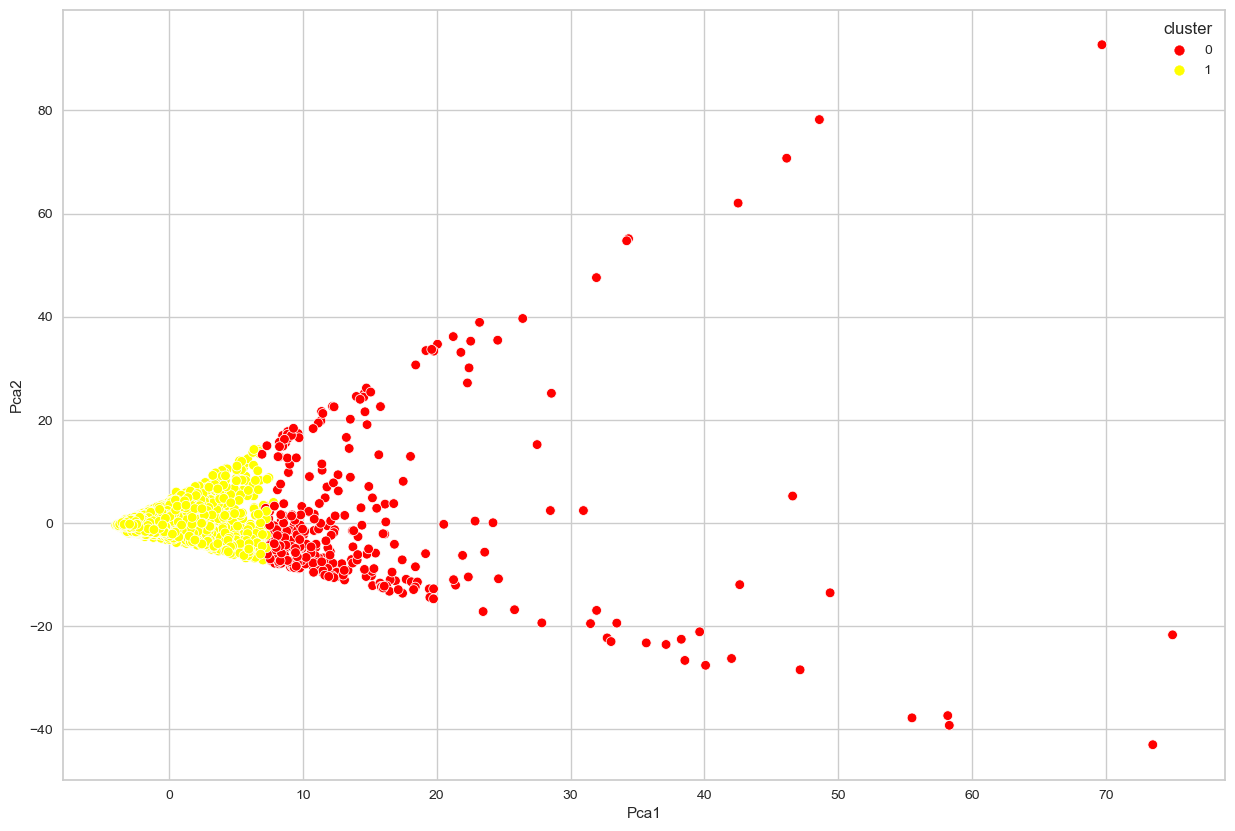

In [19]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="Pca1", y="Pca2", hue="cluster", data=final_df,palette=['red','yellow'])

plt.show()

In [20]:
import plotly.express as px

fig = px.scatter_3d(final_df, x='Pca1', y='Pca2', z='Pca3',
              color='cluster')
fig.show()

<Axes: xlabel='cluster', ylabel='purchases'>

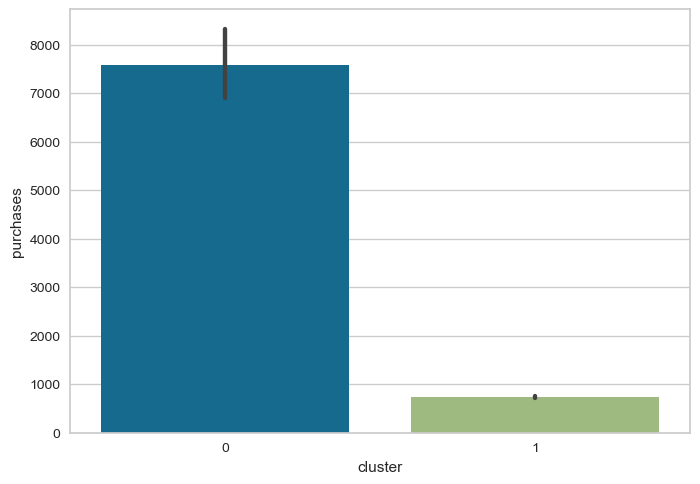

In [21]:
sns.barplot(data=clusters,y=clusters1["purchases"],x =clusters1["cluster"])


<Axes: xlabel='cluster', ylabel='balance'>

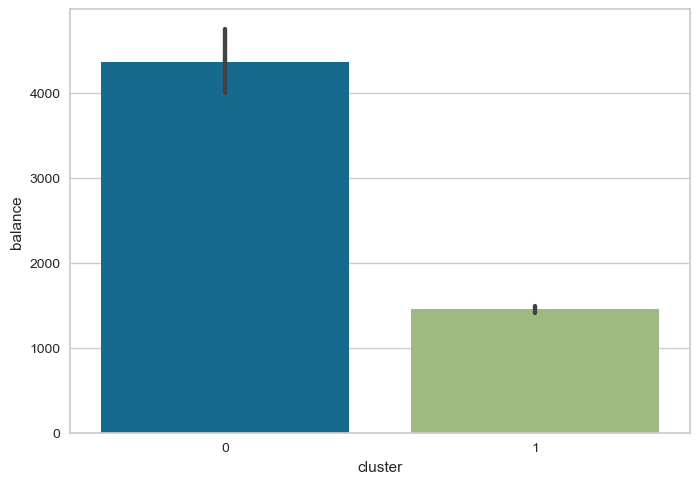

In [22]:
sns.barplot(data=clusters,y=clusters1['balance'],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='credit_limit'>

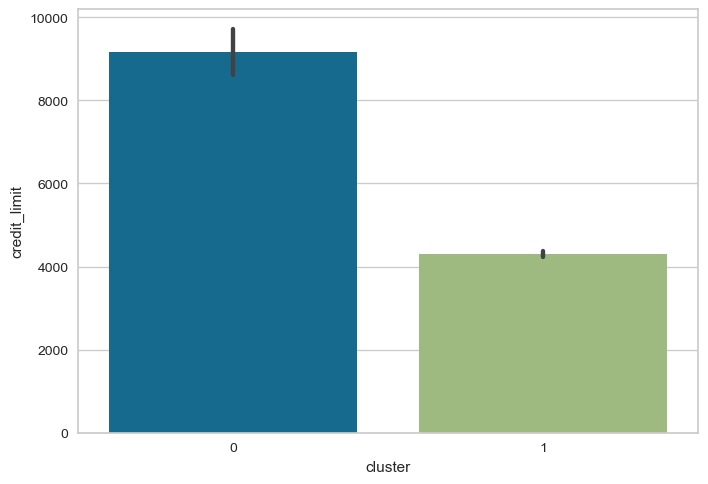

In [23]:
sns.barplot(data=clusters,y=clusters1['credit_limit'],x =clusters1["cluster"],)

<Axes: xlabel='cluster', ylabel='payments'>

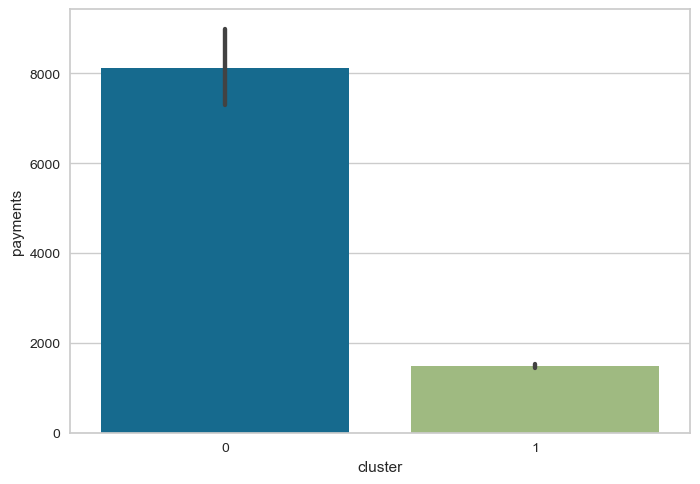

In [24]:
sns.barplot(data=clusters,y=clusters1['payments'],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='tenure'>

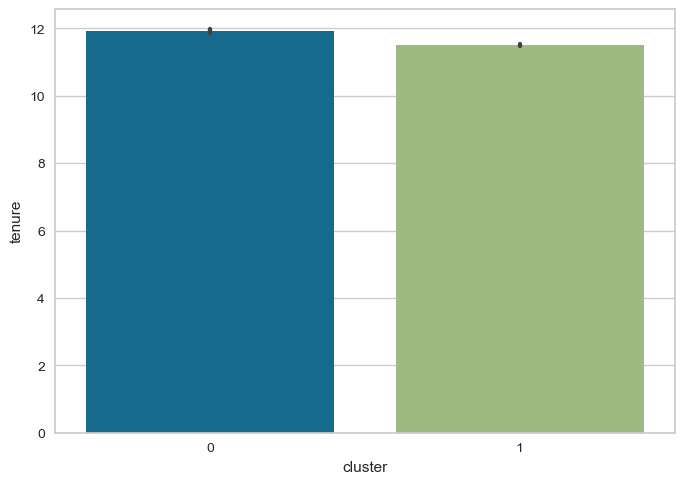

In [25]:
sns.barplot(data=clusters,y=clusters1['tenure'],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='oneoff_purchases'>

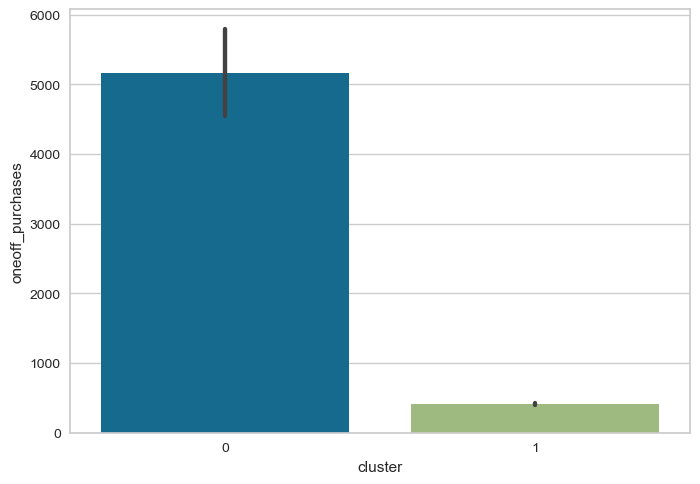

In [26]:
sns.barplot(data=clusters,y=clusters1['oneoff_purchases'],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='installments_purchases'>

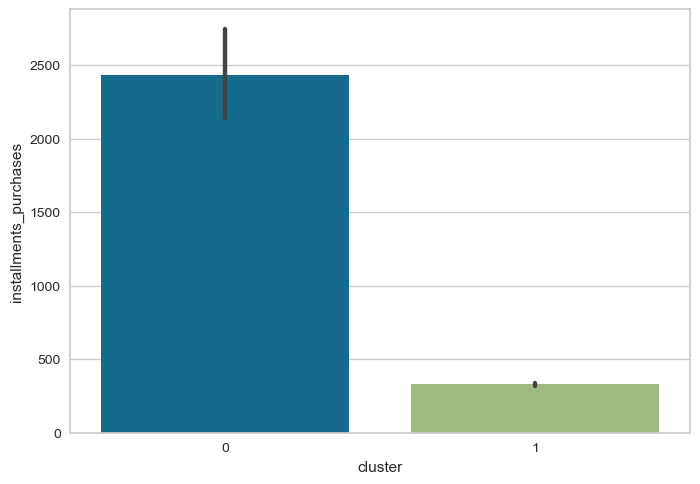

In [27]:
sns.barplot(data=clusters,y=clusters1['installments_purchases'],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='cash_advance'>

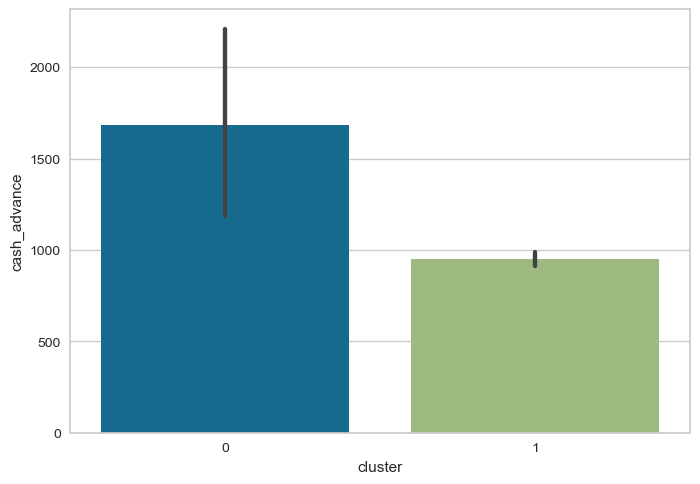

In [28]:
sns.barplot(data=clusters,y=clusters1["cash_advance"],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='prc_full_payment'>

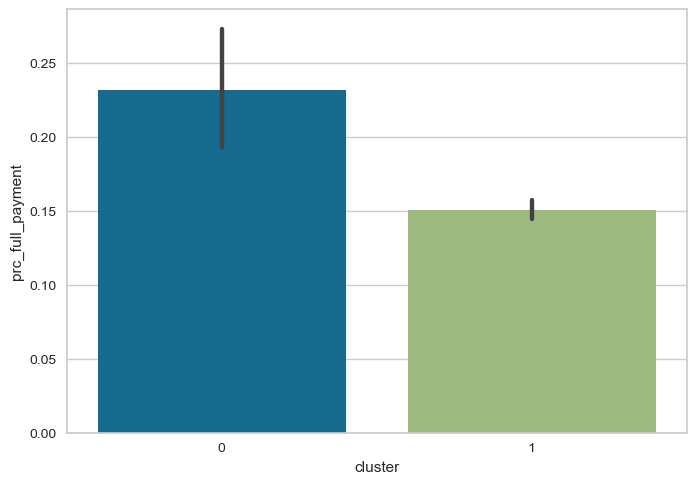

In [29]:
sns.barplot(data=clusters,y=clusters1["prc_full_payment"],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='cash_advance_frequency'>

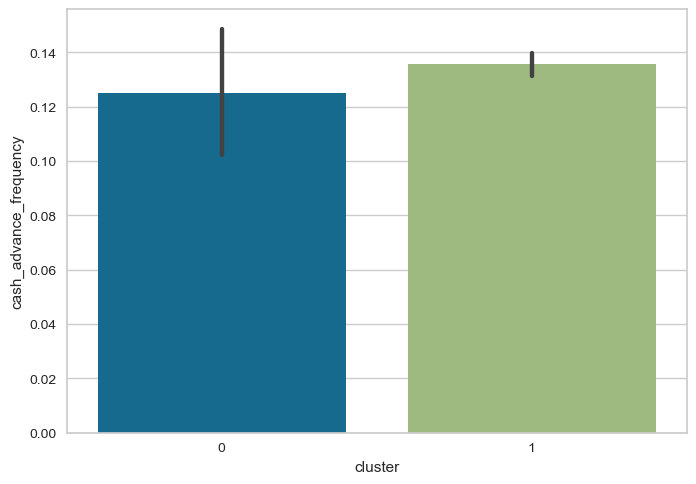

In [30]:
sns.barplot(data=clusters,y=clusters1["cash_advance_frequency"],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='purchases_trx'>

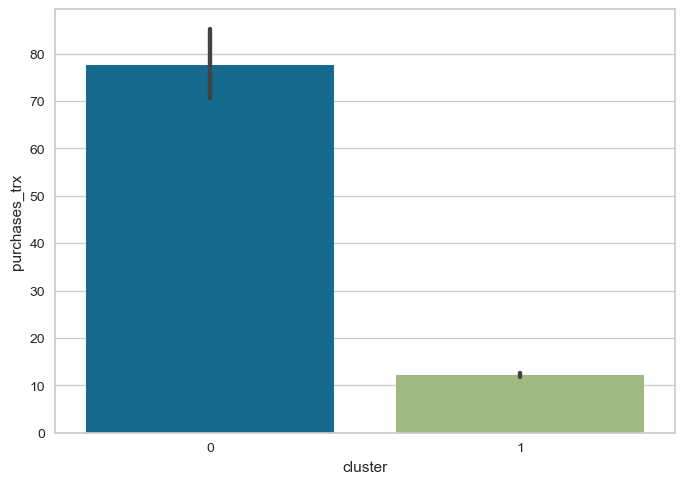

In [31]:
sns.barplot(data=clusters,y=clusters["purchases_trx"],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='minimum_payments'>

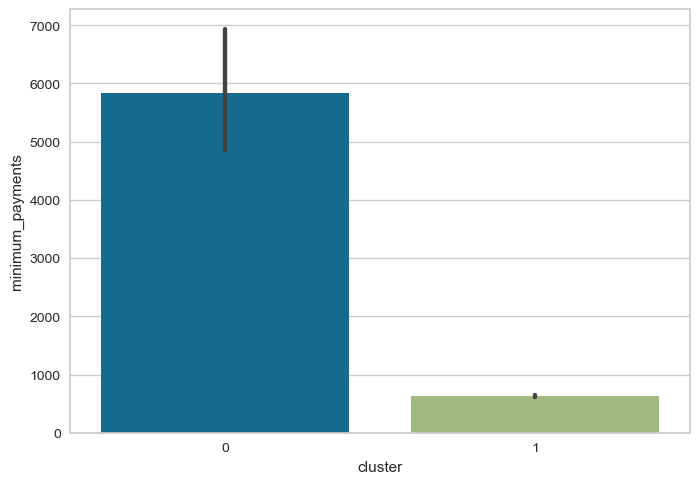

In [32]:
sns.barplot(data=clusters,y=clusters["minimum_payments"],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='balance_frequency'>

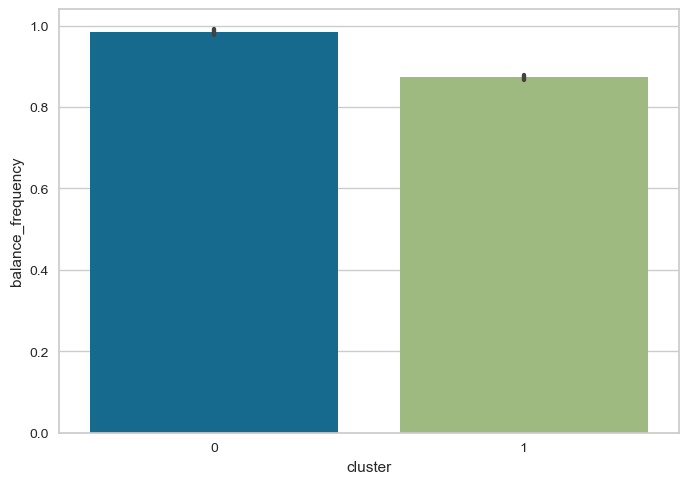

In [33]:
sns.barplot(data=clusters,y=clusters["balance_frequency"],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='oneoff_purchases_frequency'>

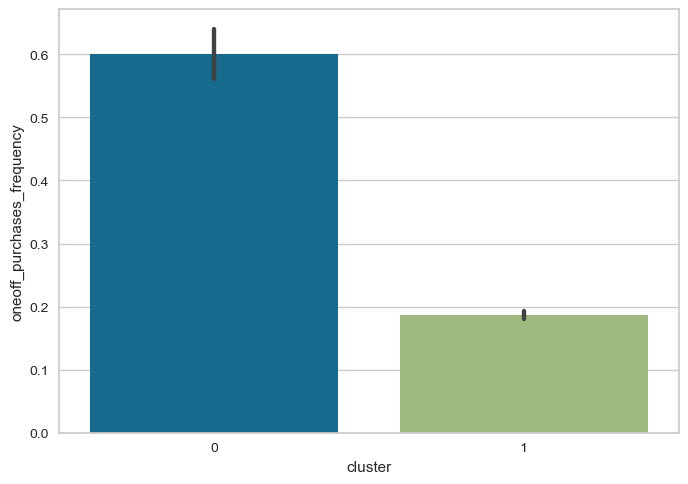

In [34]:
sns.barplot(data=clusters,y=clusters["oneoff_purchases_frequency"],x =clusters1["cluster"])

<Axes: xlabel='cluster', ylabel='purchases_installments_frequency'>

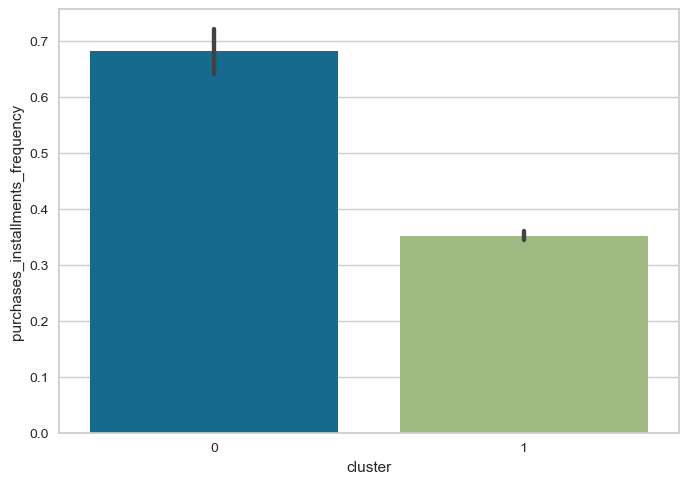

In [35]:
sns.barplot(data=clusters,y=clusters["purchases_installments_frequency"],x =clusters1["cluster"])

In [36]:
data[data["default"]==1]

,purchases,balance,credit_limit,payments,tenure,oneoff_purchases,installments_purchases,cash_advance,prc_full_payment,cash_advance_frequency,cash_advance_trx,purchases_trx,minimum_payments,balance_frequency,oneoff_purchases_frequency,purchases_installments_frequency,default
2,773.17,2495.148862,7500.0,622.066742,12,773.17,0.00,0.000000,0.00,0.000000,0,12,627.284787,1.000000,1.000000,0.000000,1
5,1333.28,1809.828751,1800.0,1400.057770,12,0.00,1333.28,0.000000,0.00,0.000000,0,8,2407.246035,1.000000,0.000000,0.583333,1
10,920.12,1293.124939,1200.0,1083.301007,12,0.00,920.12,0.000000,0.00,0.000000,0,12,2172.697765,1.000000,0.000000,1.000000,1
14,0.00,2772.772734,3000.0,805.647974,12,0.00,0.00,346.811390,0.00,0.083333,1,0,989.962866,1.000000,0.000000,0.000000,1
15,1611.70,6886.213231,8000.0,1993.439277,12,0.00,1611.70,2301.491267,0.00,0.166667,4,11,2109.906490,1.000000,0.000000,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,619.60,735.652303,1000.0,106.138603,6,255.62,363.98,546.902403,0.00,0.166667,5,16,337.294767,1.000000,0.166667,0.833333,1
8939,734.40,728.352548,1000.0,72.530037,6,734.40,0.00,239.891038,0.00,0.166667,2,2,110.950798,1.000000,0.333333,0.000000,1
8947,144.40,23.398673,1000.0,81.270775,6,0.00,144.40,0.000000,0.25,0.000000,0,5,82.418369,0.833333,0.000000,0.666667,1
8948,0.00,13.457564,500.0,52.549959,6,0.00,0.00,36.558778,0.25,0.166667,2,0,55.755628,0.833333,0.000000,0.000000,1


In [37]:
data["default"].value_counts()

0    6585
1    2365
Name: default, dtype: int64

In [38]:
x = data.drop(["default"],axis = 1)
x

,purchases,balance,credit_limit,payments,tenure,oneoff_purchases,installments_purchases,cash_advance,prc_full_payment,cash_advance_frequency,cash_advance_trx,purchases_trx,minimum_payments,balance_frequency,oneoff_purchases_frequency,purchases_installments_frequency
0,95.40,40.900749,1000.0,201.802084,12,0.00,95.40,0.000000,0.000000,0.000000,0,2,139.509787,0.818182,0.000000,0.083333
1,0.00,3202.467416,7000.0,4103.032597,12,0.00,0.00,6442.945483,0.222222,0.250000,4,0,1072.340217,0.909091,0.000000,0.000000
2,773.17,2495.148862,7500.0,622.066742,12,773.17,0.00,0.000000,0.000000,0.000000,0,12,627.284787,1.000000,1.000000,0.000000
3,1499.00,1666.670542,7500.0,0.000000,12,1499.00,0.00,205.788017,0.000000,0.083333,1,1,0.000000,0.636364,0.083333,0.000000
4,16.00,817.714335,1200.0,678.334763,12,16.00,0.00,0.000000,0.000000,0.000000,0,1,244.791237,1.000000,0.083333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,291.12,28.493517,1000.0,325.594462,6,0.00,291.12,0.000000,0.500000,0.000000,0,6,48.886365,1.000000,0.000000,0.833333
8946,300.00,19.183215,1000.0,275.861322,6,0.00,300.00,0.000000,0.000000,0.000000,0,6,0.000000,1.000000,0.000000,0.833333
8947,144.40,23.398673,1000.0,81.270775,6,0.00,144.40,0.000000,0.250000,0.000000,0,5,82.418369,0.833333,0.000000,0.666667
8948,0.00,13.457564,500.0,52.549959,6,0.00,0.00,36.558778,0.250000,0.166667,2,0,55.755628,0.833333,0.000000,0.000000


In [39]:
y = data["default"]
y

0       0
1       0
2       1
3       0
4       0
       ..
8945    0
8946    0
8947    1
8948    1
8949    1
Name: default, Length: 8950, dtype: int64

In [40]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

In [41]:
x_train

,purchases,balance,credit_limit,payments,tenure,oneoff_purchases,installments_purchases,cash_advance,prc_full_payment,cash_advance_frequency,cash_advance_trx,purchases_trx,minimum_payments,balance_frequency,oneoff_purchases_frequency,purchases_installments_frequency
1379,380.00,1916.470203,8500.0,577.247923,12,0.00,380.00,0.000000,0.000000,0.000000,0,6,439.337182,1.000000,0.000000,0.416667
7221,295.00,1153.961386,1200.0,428.640942,12,295.00,0.00,0.000000,0.000000,0.000000,0,4,964.205478,1.000000,0.333333,0.000000
2328,82.00,234.700486,4200.0,350.773984,12,82.00,0.00,0.000000,0.000000,0.000000,0,2,215.834479,1.000000,0.083333,0.000000
7877,1228.07,2912.281553,5400.0,1305.296349,12,0.00,1228.07,2784.294727,0.000000,0.416667,10,111,1274.258165,1.000000,0.000000,1.000000
2546,0.00,5010.879703,7000.0,1327.690018,12,0.00,0.00,2181.390333,0.000000,0.250000,7,0,1273.479311,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1132.03,3092.948987,7000.0,889.901799,12,1038.75,93.28,3988.939447,0.000000,0.666667,25,19,883.612427,1.000000,0.250000,0.583333
8922,145.98,33.812837,1500.0,53.676054,6,0.00,145.98,0.000000,0.250000,0.000000,0,6,81.407073,1.000000,0.000000,0.833333
7869,23.75,183.285840,500.0,584.679478,12,23.75,0.00,64.006247,0.083333,0.083333,2,1,139.651483,1.000000,0.083333,0.000000
4974,300.00,10.684577,4000.0,368.807294,12,0.00,300.00,0.000000,0.000000,0.000000,0,3,0.000000,0.181818,0.000000,0.250000


In [42]:
y_train

1379    0
7221    1
2328    0
7877    0
2546    0
       ..
6488    0
8922    1
7869    0
4974    0
4613    0
Name: default, Length: 7160, dtype: int64

In [43]:
desired_minority_samples = int(0.4 *7160)
smote = SMOTE(sampling_strategy={1: desired_minority_samples}, random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [44]:
x_resampled

,purchases,balance,credit_limit,payments,tenure,oneoff_purchases,installments_purchases,cash_advance,prc_full_payment,cash_advance_frequency,cash_advance_trx,purchases_trx,minimum_payments,balance_frequency,oneoff_purchases_frequency,purchases_installments_frequency
0,380.000000,1916.470203,8500.000000,577.247923,12,0.000000,380.000000,0.000000,0.000000,0.000000,0,6,439.337182,1.000000,0.000000,0.416667
1,295.000000,1153.961386,1200.000000,428.640942,12,295.000000,0.000000,0.000000,0.000000,0.000000,0,4,964.205478,1.000000,0.333333,0.000000
2,82.000000,234.700486,4200.000000,350.773984,12,82.000000,0.000000,0.000000,0.000000,0.000000,0,2,215.834479,1.000000,0.083333,0.000000
3,1228.070000,2912.281553,5400.000000,1305.296349,12,0.000000,1228.070000,2784.294727,0.000000,0.416667,10,111,1274.258165,1.000000,0.000000,1.000000
4,0.000000,5010.879703,7000.000000,1327.690018,12,0.000000,0.000000,2181.390333,0.000000,0.250000,7,0,1273.479311,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8127,471.461311,1455.477865,1500.000000,662.552038,11,424.381584,47.079727,0.000000,0.000000,0.000000,0,12,795.937738,0.932096,0.512864,0.135807
8128,41.271258,4902.378031,8609.414788,1162.463789,12,41.271258,0.000000,1745.455139,0.000000,0.398431,5,0,1539.583121,1.000000,0.018236,0.000000
8129,0.000000,2835.219737,3000.000000,704.346764,12,0.000000,0.000000,411.225900,0.000000,0.166667,2,0,940.360474,1.000000,0.000000,0.000000
8130,906.061550,5449.215813,6297.271262,1991.995891,12,673.121877,232.939673,4349.264823,0.000000,0.623105,21,14,2150.859356,1.000000,0.460986,0.420456


In [45]:
y_resampled

0       0
1       1
2       0
3       0
4       0
       ..
8127    1
8128    1
8129    1
8130    1
8131    1
Name: default, Length: 8132, dtype: int64

In [46]:
y_resampled.value_counts()

0    5268
1    2864
Name: default, dtype: int64

In [47]:
def evaluation(model,x,y):
    y_pred = model.predict(x)
    accuracy = accuracy_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    class_report = classification_report(y,y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

In [48]:
rf =RandomForestClassifier(n_estimators=100, random_state=42)

In [49]:
rf.fit(x_resampled.values, y_resampled.values)

RandomForestClassifier(random_state=42)

In [50]:
print("testing data evaluation".center(40,"*"))
evaluation(rf,x_test,y_test)

********testing data evaluation*********
Accuracy: 0.96
Confusion Matrix:
[[1282   35]
 [  30  443]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1317
           1       0.93      0.94      0.93       473

    accuracy                           0.96      1790
   macro avg       0.95      0.95      0.95      1790
weighted avg       0.96      0.96      0.96      1790



In [51]:
print("trainig data evaluation".center(40,"*"))
evaluation(rf,x_resampled,y_resampled)

********trainig data evaluation*********
Accuracy: 1.00
Confusion Matrix:
[[5268    0]
 [   0 2864]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5268
           1       1.00      1.00      1.00      2864

    accuracy                           1.00      8132
   macro avg       1.00      1.00      1.00      8132
weighted avg       1.00      1.00      1.00      8132



In [52]:
x_resampled.head()

,purchases,balance,credit_limit,payments,tenure,oneoff_purchases,installments_purchases,cash_advance,prc_full_payment,cash_advance_frequency,cash_advance_trx,purchases_trx,minimum_payments,balance_frequency,oneoff_purchases_frequency,purchases_installments_frequency
0,380.00,1916.470203,8500.0,577.247923,12,0.0,380.00,0.000000,0.0,0.000000,0,6,439.337182,1.0,0.000000,0.416667
1,295.00,1153.961386,1200.0,428.640942,12,295.0,0.00,0.000000,0.0,0.000000,0,4,964.205478,1.0,0.333333,0.000000
2,82.00,234.700486,4200.0,350.773984,12,82.0,0.00,0.000000,0.0,0.000000,0,2,215.834479,1.0,0.083333,0.000000
3,1228.07,2912.281553,5400.0,1305.296349,12,0.0,1228.07,2784.294727,0.0,0.416667,10,111,1274.258165,1.0,0.000000,1.000000
4,0.00,5010.879703,7000.0,1327.690018,12,0.0,0.00,2181.390333,0.0,0.250000,7,0,1273.479311,1.0,0.000000,0.000000


In [53]:
x_resampled.columns

Index(['purchases', 'balance', 'credit_limit', 'payments', 'tenure',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'prc_full_payment', 'cash_advance_frequency', 'cash_advance_trx',
       'purchases_trx', 'minimum_payments', 'balance_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency'],
      dtype='object')

In [54]:
purchases = 77.8
balance = 51.161976
credit_limit=4500
payments = 1665
tenure = 8
oneoff_purchases = 736
installments_purchases=0
cash_advance=0
prc_full_payment=0
cash_advance_frequency= 0
cash_advance_trx = 0
purchases_trx = 5
minimum_payments = 54   
balance_frequency = 0.25
oneoff_purchases_frequency = 0.5
purchases_installments_frequency= 0.0

In [55]:
test_array = np.zeros(16)
test_array[0]= purchases
test_array[1]= balance
test_array[2]= credit_limit
test_array[3]= payments
test_array[4]= tenure
test_array[5]= oneoff_purchases
test_array[6]= installments_purchases
test_array[7]= cash_advance
test_array[8]= prc_full_payment
test_array[9]= cash_advance_frequency
test_array[10]= cash_advance_trx
test_array[11]= purchases_trx
test_array[12]= minimum_payments
test_array[13]= balance_frequency
test_array[14]= oneoff_purchases_frequency
test_array[15]= purchases_installments_frequency

In [56]:
trf1 = RobustScaler()
trf2 = PCA(n_components = 7,random_state=12) 
trf3 = KMeans(n_clusters=2,random_state=12,max_iter=1000)



In [57]:
pipeline = make_pipeline(trf1,trf2,trf3)

In [63]:
pipeline.fit(df.values)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('pca', PCA(n_components=7, random_state=12)),
                ('kmeans',
                 KMeans(max_iter=1000, n_clusters=2, random_state=12))])

In [64]:
pipeline.predict([test_array])

array([1])

In [65]:
rf.predict([test_array])

array([0], dtype=int64)

In [61]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [62]:
with open('rf.pkl','wb') as f:
    pickle.dump(rf,f)